# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [16]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Understanding the structure of the data

In [17]:
#Connecting to drive to access the food hub data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/AI and Machine Learning/Python Course/Week 4 - EDA/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [19]:
#shape gives no. of rows and columns present in the dataset
df.shape

(1898, 9)

Observations:
Food hub data has 1898 rows and 9 columns



In [20]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: Out of total 9 attributes, 5  are numbers (int and float), 4 are strings (objects)

Order_id (int64), customer_id (int64), cost_of_the_order (float64), food_preparation_time (int64) and delivery_time(int64) are numbers.

restaurant_name (object), cuisine_type (object), day_of_the_week (object), rating(object) are of object (string) datatypes





In [21]:
# is null function will give the records where there are missing values and sum function will add the number of missing values per attribute
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values in the data.


In [22]:
#describe function is used to find the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations: From all the orders
Minimum food preparation time is 20 minutes.

Average food preparation time is 27.37 minutes

Maximun food preparation time is 35 minutes

In [23]:
#Method 1: nunique function is used to get the count of unique values.
df['order_id'][df['rating']=='Not given'].nunique()

#Method 2: Easier way would be to calculate value counts. Both these counts will give the same result
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There 736 orders that are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [24]:
# Checking for number of unique orders, customers, restaurants and cuisines
df[['order_id','customer_id','restaurant_name','cuisine_type']].nunique()

order_id           1898
customer_id        1200
restaurant_name     178
cuisine_type         14
dtype: int64

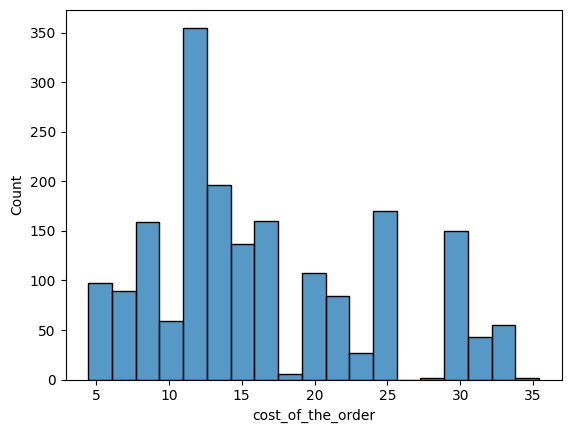

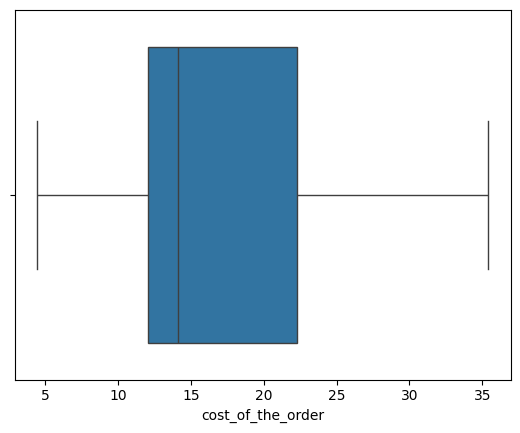

In [25]:
# Lets analyze how the cost of the orders are distributed using histogram and boxplot
sns.histplot(df,x='cost_of_the_order')
plt.show()
sns.boxplot(df,x='cost_of_the_order')
plt.show()

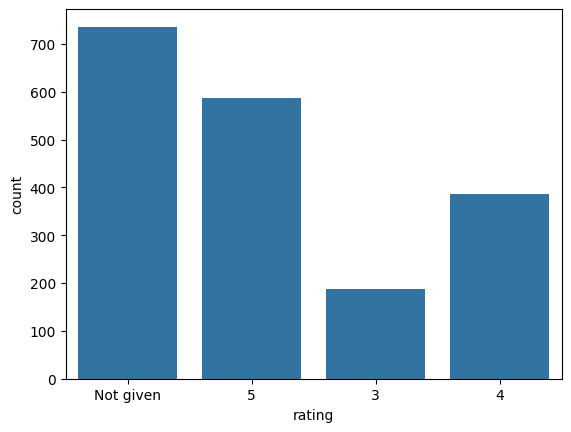

In [26]:
# Lets analyze rating column using bar chart
sns.countplot(df,x='rating')
plt.show()

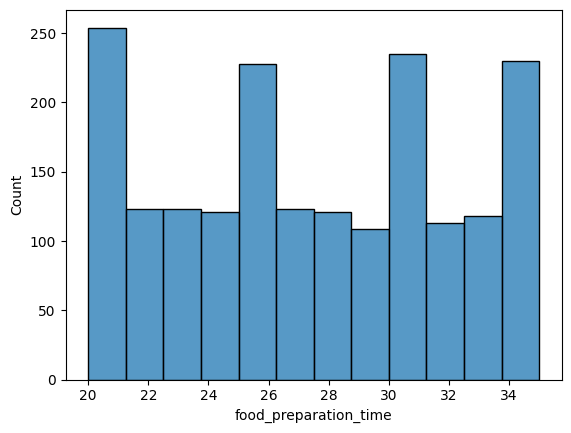

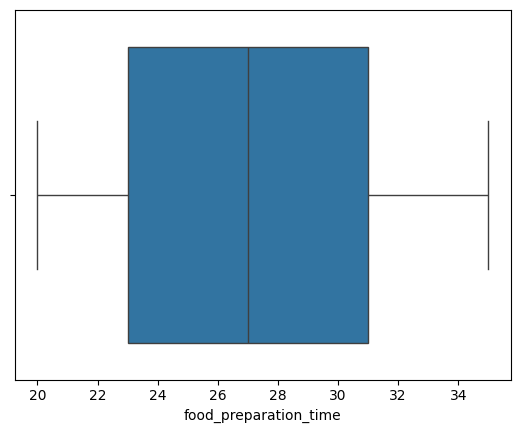

In [27]:
# Lets analyze distribution of food preparation time using histogram and boxplot
sns.histplot(df,x='food_preparation_time')
plt.show()
sns.boxplot(df,x='food_preparation_time')
plt.show()

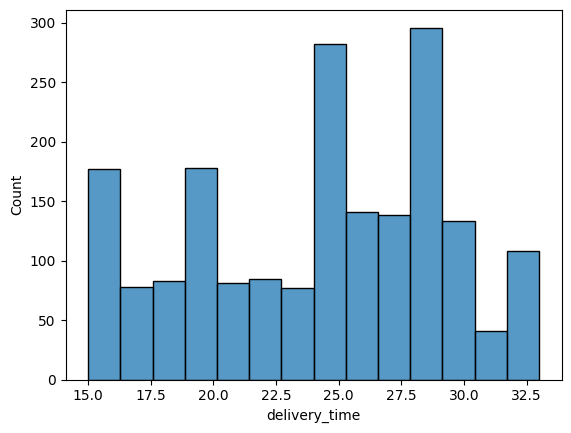

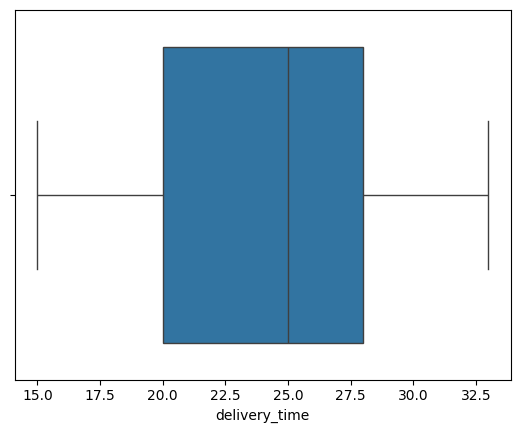

In [28]:
# Lets analyze distribution of delivery time using histogram and boxplot
sns.histplot(df,x='delivery_time')
plt.show()
sns.boxplot(df,x='delivery_time')
plt.show()

**Observations:**

1.   There are 178 unique restaurants and 14 cuisine types in the dataset

2.   Median cost of order is around 14 dollars. 75% of cost of orders are  below $ 23. Overall, cost of order is little right skewed.

3.   736 orders are not rated. This is a high number compared to the number of orders that are rated. Out of rated orders, most of them are highly rated with 5 rating. Also we do not have 1 and 2 ratings.


4.   75% of orders have food preparation time of below 31 minutes with median food preparation time of around 27 mins. Most of the orders take 20 to 23 mins to prepare the food.

5. 75% of orders have delivery time of below 28 minutes with median delivery time of around 25 mins. Most of the orders take 28 to 30 mins to deliver the food.



### *Top 5 restaurants in terms of the number of orders received

In [29]:
#There are multiple ways to find this. Lets use group by and count to get the restaurant with most orders and then sort the values to get top restaurants
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### **Observations**:

Shake Shack,
The Meatball Shop,
Blue Ribbon Sushi,
Blue Ribbon Fried Chicken and
Parm are the top 5 restaurants based on number of orders received.


### Most popular cuisine on weekends

In [30]:
#First filter weekend orders and lets use group by and count to get the cuisine with most orders and then sort the values to get top cuisines
df[df['day_of_the_week']=='Weekend'].groupby(['cuisine_type'])['order_id'].count().sort_values(ascending=False).head(1)

cuisine_type
American    415
Name: order_id, dtype: int64

#### **Observations**:
American cuisine is the most popular cuisine with 415 orders on the weekends


###Percentage of the orders cost more than 20 dollars

In [31]:
#Lets find the orders that costs more than $20 and divide it by total orders
df['order_id'][df['cost_of_the_order']>20].nunique()/df['order_id'].nunique()*100

29.24130663856691

#### **Observations**:
29.2% of all orders costs more than $ 20


###Mean order delivery time

In [32]:
#Using mean function to get average delivery time
df['delivery_time'].mean()

24.161749209694417

#### **Observations**:
Average order delivery time is 24.16 minutes.


###Top 3 most frequent customers.

In [33]:
df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### **Observations**:
Top 3 most frequent customers are with customer Ids 52832, 47440 and 83287


### Multivariate Analysis

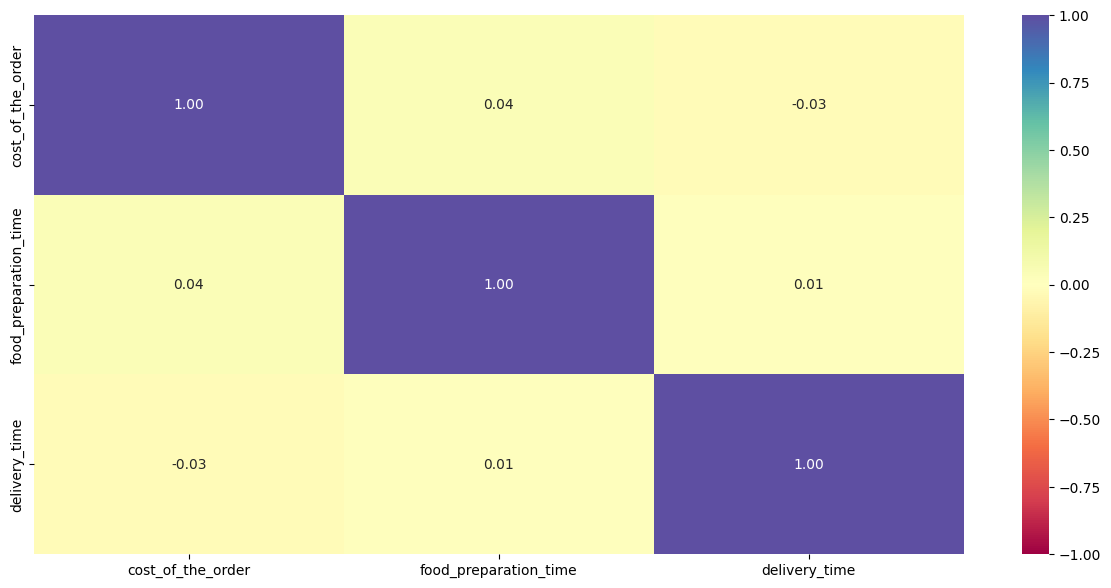

In [34]:
# Lets do a correlation analysis of the varaiables
variables = ['cost_of_the_order','food_preparation_time','delivery_time']
corr = df[variables].corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

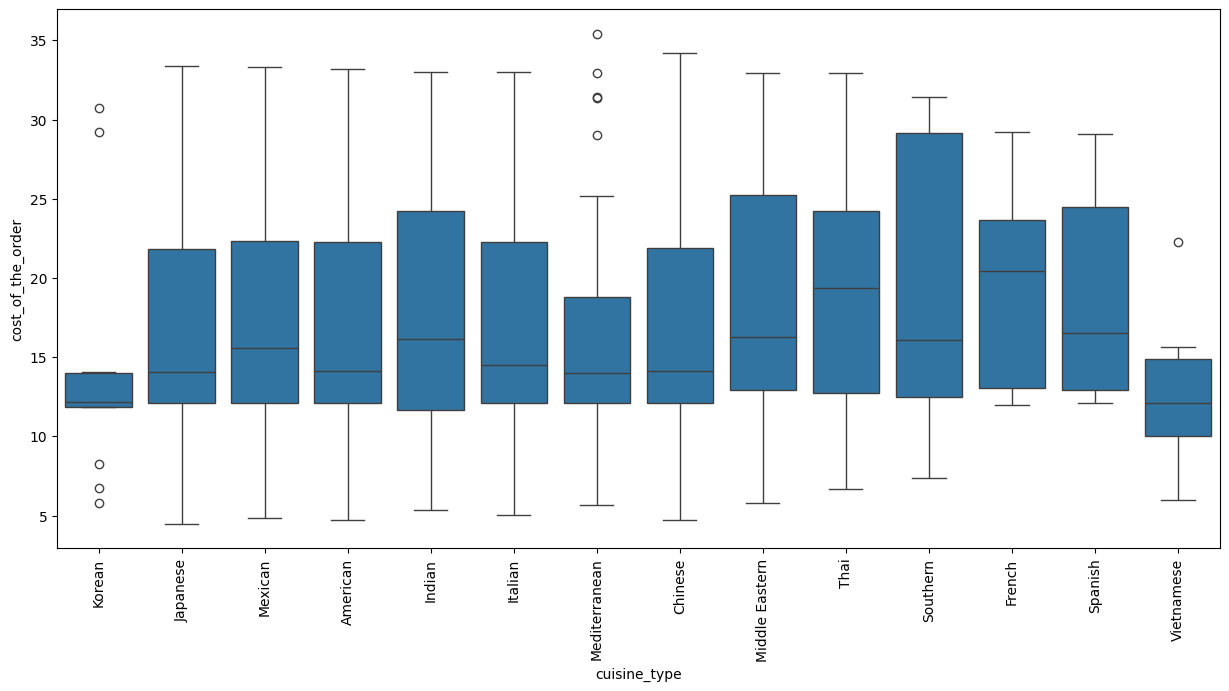

In [35]:
# Cuisine and cost of the order analysis
plt.figure(figsize=(15,7))
sns.boxplot(df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()


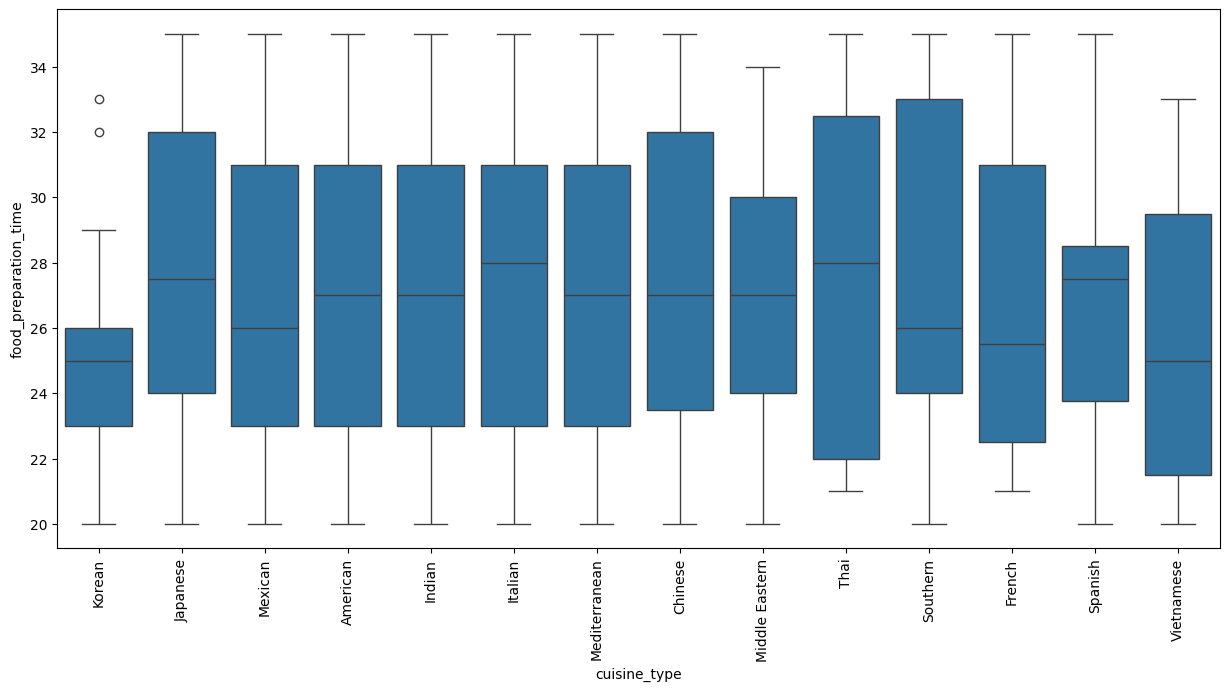

In [36]:
#Cuisine and food preparation time analysis
plt.figure(figsize=(15,7))
sns.boxplot(df,x='cuisine_type',y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

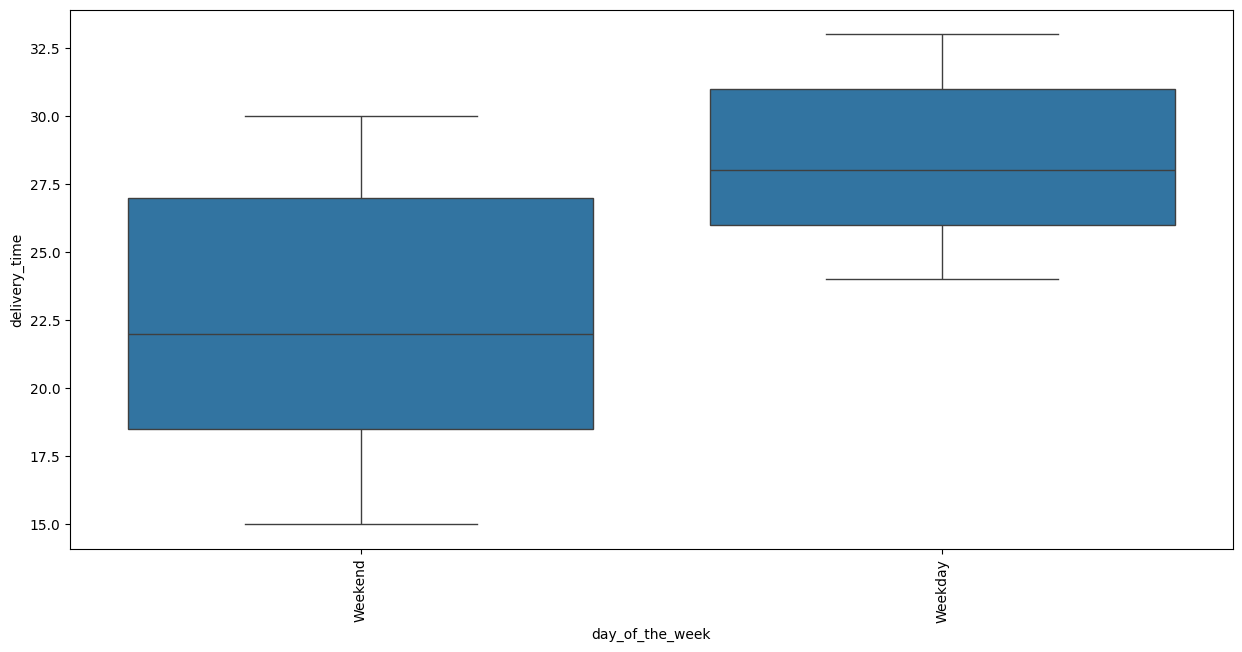

In [37]:
# Lets analyze how delivery time varies depending on the weekday vs weekend
plt.figure(figsize=(15,7))
sns.boxplot(df,x='day_of_the_week',y='delivery_time')
plt.xticks(rotation=90)
plt.show()


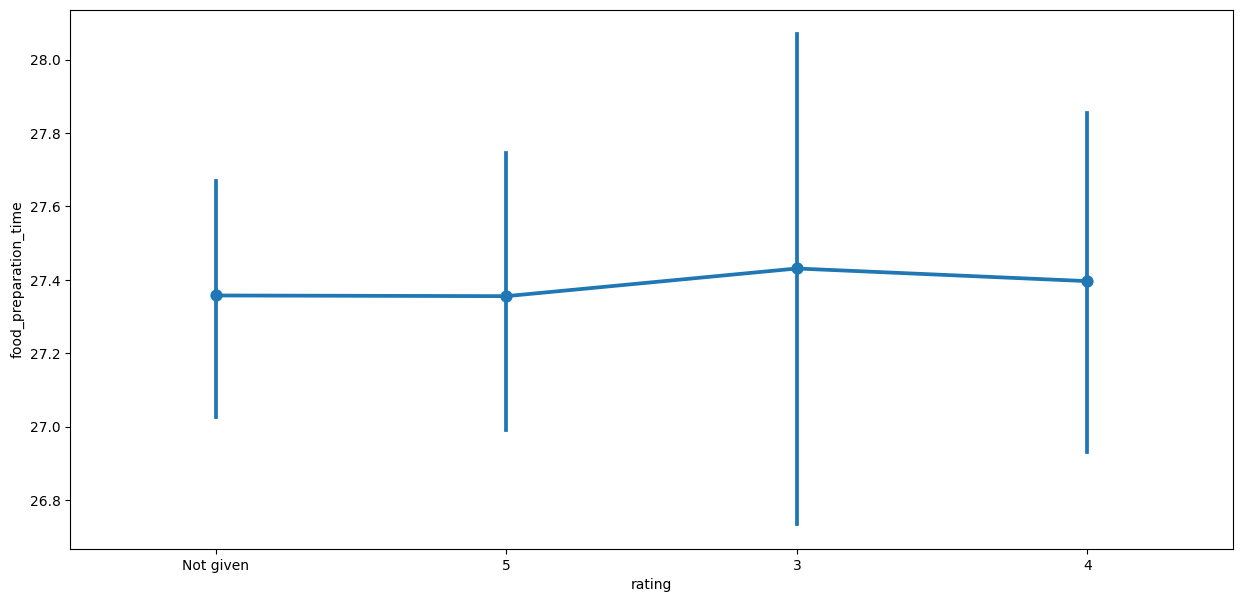

In [38]:
#Lets analyze rating and food preparation times
plt.figure(figsize=(15, 7))
sns.pointplot(df, x = 'rating', y = 'food_preparation_time')
plt.show()

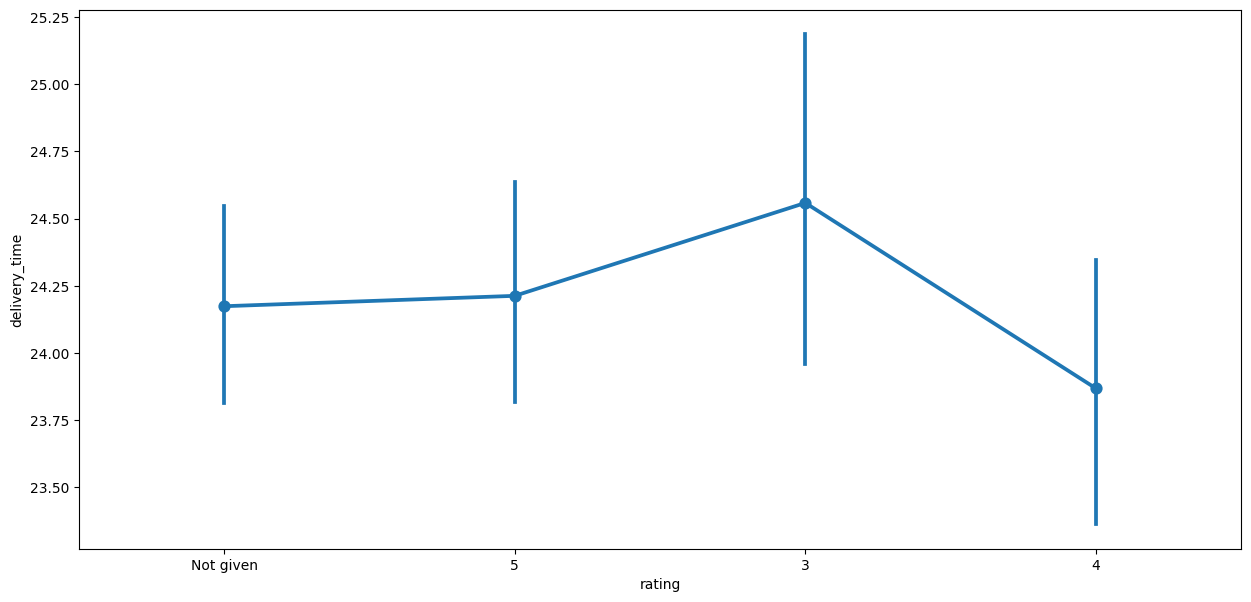

In [39]:
#Lets analyze rating and delivery times
plt.figure(figsize=(15, 7))
sns.pointplot(df, x = 'rating', y = 'delivery_time')
plt.show()

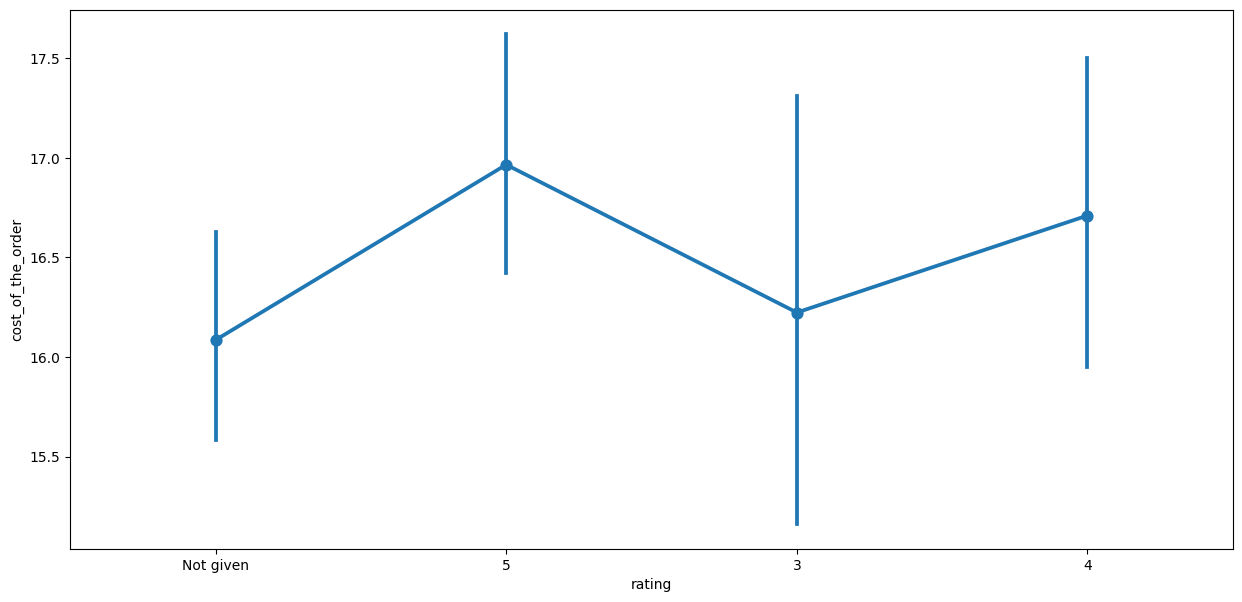

In [40]:
#Lets see how cost of order affects rating
plt.figure(figsize=(15, 7))
sns.pointplot(df, x = 'rating', y = 'cost_of_the_order')
plt.show()

In [41]:
#Lets get top 10 restaurants with revenue generated
df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head(10)

restaurant_name
Shake Shack                     3579.53
The Meatball Shop               2145.21
Blue Ribbon Sushi               1903.95
Blue Ribbon Fried Chicken       1662.29
Parm                            1112.76
RedFarm Broadway                 965.13
RedFarm Hudson                   921.21
TAO                              834.50
Han Dynasty                      755.29
Blue Ribbon Sushi Bar & Grill    666.62
Name: cost_of_the_order, dtype: float64

**Observations:**
1. There is no strong correlation between cost, food preparation time and delivery times.
2. Korean and Vietnamese are the least expensive cuisines with median cost around 12 dollars. French and Thai are the most expensive with median cost around 20 dollars. There are outliers in the cost in korean, mediterranean and Vietnamese cuisines.
3. Thai and Italian takes most amount of time to prepare the food with median time around 28 minutes. Korean and Vietnamese takes least amount of time to prepare food with median around 25 mins.
4. Delivery times on the weekday are higher than the delivery times on the weekend. On weekend the median delivery time is around 22 mins where as on the weekday it is higher with median delivery time around 28 mins.
5. Lower rating of 3 is associated with orders of higher delivery time, how ever the delivery time in minutes differ slightly in relation to ratings
6. Top 10 restaurants with revenue generated are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm, RedFarm Broadway, RedFarm Hudson, TAO, Han Dynasty, Blue Ribbon Sushi Bar & Grill

In [42]:
ratings = df[df['rating']!='Not given']
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 90.8+ KB


**Restaurants with rating count of more than 50 and the average rating greater than 4**

In [43]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


#### **Observations**:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and RedFarm Broadway	are the restaurants with atleast 50


###If the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. The net revenue generated by the company across all orders.

In [44]:
# Writing a definition to apply charge on the order cost
def revenue_cal(x):
  if x > 20:
    return x * .25
  elif x > 5:
    return x * .15
  else:
    return x * 0

In [45]:
# Creating a new attribute for the revenue and applying the revenue_cal definition
df['company_revenue'] = df['cost_of_the_order'].apply(revenue_cal)
df['company_revenue'].sum()

6166.303

#### **Observations**:
Net revenue generated by the company across all orders is $ 6166.303


###The percentage of orders take more than 60 minutes to get delivered from the time the order is placed (The food has to be prepared and then delivered.)

In [46]:
# Write the code here
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
df['total_delivery_time'][df['total_delivery_time']>60].count()/df.shape[0]*100

10.537407797681771

#### **Observations**:
10.5 % orders take more than 60 minutes to get delivered from the time the order is placed.

###The mean delivery time vary during weekdays and weekends

In [47]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

#### **Observations**:
Average delivery time on the weekday is higher than the weekends with 28.34 minutes and 22.47 minutes respectively.


### Conclusion and Recommendations to improve the business

### Conclusions:

**Revenue Analysis:**
The company has generated a net revenue of $6166.303 across all orders.

**Cuisine and Cost Analysis:**
Korean and Vietnamese cuisines are the least expensive, while French and Thai cuisines are the most expensive.
Outliers in cost are observed in Korean, Mediterranean, and Vietnamese cuisines.

**Preparation Time Analysis:**
Thai and Italian cuisines take the most time to prepare food.
Korean and Vietnamese cuisines take the least time to prepare food.

**Delivery Time Analysis:**
Approximately 10.5% of orders take more than 60 minutes to get delivered.
Delivery times on weekdays are generally higher than on weekends.

**Rating Analysis:**
Lower ratings of 3 are associated with orders of higher delivery time.
However, the difference in delivery time in minutes varies slightly in relation to ratings.

**Top Restaurants by Revenue:**
The top 10 restaurants with the highest revenue generated are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm, RedFarm Broadway, RedFarm Hudson, TAO, Han Dynasty, and Blue Ribbon Sushi Bar & Grill

### Recommendations:


**Improve Delivery Time on Weekdays:**
Given that delivery times on weekdays are generally higher than on weekends, the company may consider implementing strategies to improve efficiency and reduce delivery times during weekdays like
 1.   Recruit more delivery drivers near top restaurants by orders to decrease the delivery time.
 2. Manage customers expectation by providing appropriate ETA. Providing necessary ETA might positively impact ratings.
 3. Send a count down to delivery drivers from the order placed time based on median food preparation time to efficiently use the drivers. For example, Koran cuisines take median time of 25 mins. Send 25 min count down to delivery drivers who are picking up food from korean cuisines.



**Address Outliers in Cost:**
Investigate and address the outliers in cost observed in Korean, Mediterranean, and Vietnamese cuisines. This may involve working closely with the respective restaurants to optimize pricing or identify any issues affecting cost outliers.

**Rewards Programs:**
Create rewards for expensive cusines. So that when customer places an order the margin for the company is higher.

**Enhance Customer Communication:**
As some orders take more than 60 minutes for delivery, improving communication with customers about expected delivery times could help manage expectations and enhance customer satisfaction. This will also positively impact rating.


**Customer Engagement:**
1.   There are lot of orders with ratings Not given. Encourage customers to rate their orders by possibly offering incentives or discounts for providing feedback. This can help in obtaining more ratings and improving the overall customer experience.
2.   Send coupons to customers to order food from least popular restaurants to introduce them to customers to increase margins in the future.

**Explore Marketing Strategies:**
Leverage the popularity of top revenue-generating restaurants in marketing efforts to attract more customers. Collaborate with these restaurants for promotional activities.

**Optimize Food Preparation Process:**
Work with restaurants that have longer food preparation times to optimize their processes and reduce preparation times. This can contribute to overall customer satisfaction.


Continuous monitoring and feedback analysis will help in refining strategies over time.



---